In [1]:
import pandas as pd
df=pd.read_csv("kc_house_data.csv")

In [2]:
import matplotlib.pyplot as plt

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#aykırı veri
q1=df["price"].quantile(0.25)
q2=df["price"].quantile(0.50) #medyan
q3=df["price"].quantile(0.75)

range=q3-q1
IQR=1.5 * range

print(f"INFO {q1},{q2},{q3},{IQR},{q3+IQR}")

print("OUTLİERS 1")
price_outliers=df[df["price"] > q3 + IQR]
print(price_outliers)


INFO 321950.0,450000.0,645000.0,484575.0,1129575.0
OUTLİERS 1
               id             date      price  bedrooms  bathrooms  \
5      7237550310  20140512T000000  1225000.0         4       4.50   
21     2524049179  20140826T000000  2000000.0         3       2.75   
49      822039084  20150311T000000  1350000.0         3       2.50   
69     1802000060  20140612T000000  1325000.0         5       2.25   
125    4389200955  20150302T000000  1450000.0         4       2.75   
...           ...              ...        ...       ...        ...   
21568   524059330  20150130T000000  1700000.0         4       3.50   
21576  9253900271  20150107T000000  3567000.0         5       4.50   
21590  7430200100  20140514T000000  1222500.0         4       3.50   
21597   191100405  20150421T000000  1575000.0         4       3.25   
21600   249000205  20141015T000000  1537000.0         5       3.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
5             5420    10193

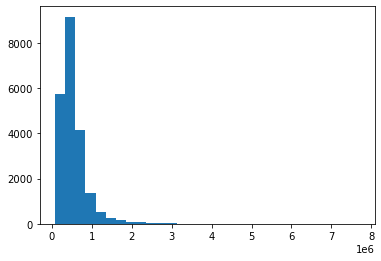

In [5]:
plt.hist(df["price"],bins=30)
plt.show()

In [6]:
mean=df["price"].mean()
std=df["price"].std()

In [7]:
limit=mean + 3 *std
print("OUTLİERS 2")
#print(df[df["price"] > limit])
print(df[(df["price"] > limit) & (df["price"] > q3 + IQR)])


OUTLİERS 2
               id             date      price  bedrooms  bathrooms  \
21     2524049179  20140826T000000  2000000.0         3       2.75   
153    7855801670  20150401T000000  2250000.0         4       3.25   
246    2025069065  20140929T000000  2400000.0         4       2.50   
269    7960900060  20150504T000000  2900000.0         4       3.25   
282    7424700045  20150513T000000  2050000.0         5       3.00   
...           ...              ...        ...       ...        ...   
21514  3262300818  20150227T000000  1865000.0         4       3.75   
21530  8964800330  20150407T000000  3000000.0         4       3.75   
21540   715010530  20150113T000000  1881580.0         5       3.50   
21568   524059330  20150130T000000  1700000.0         4       3.50   
21576  9253900271  20150107T000000  3567000.0         5       4.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21            3050     44867     1.0           0     4  ...      9   
153     

In [8]:
mean=df["sqft_living"].mean()
std=df["sqft_living"].std()

print(df[df["sqft_living"] > mean +std *3])

               id             date      price  bedrooms  bathrooms  \
5      7237550310  20140512T000000  1225000.0         4       4.50   
153    7855801670  20150401T000000  2250000.0         4       3.25   
269    7960900060  20150504T000000  2900000.0         4       3.25   
270    4054500390  20141007T000000  1365000.0         4       4.75   
419    8678500060  20140710T000000  1550000.0         5       4.25   
...           ...              ...        ...       ...        ...   
21520  7237550100  20140825T000000  1408760.0         4       4.00   
21521  7430500110  20141209T000000  1378000.0         5       3.50   
21530  8964800330  20150407T000000  3000000.0         4       3.75   
21576  9253900271  20150107T000000  3567000.0         5       4.50   
21590  7430200100  20140514T000000  1222500.0         4       3.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
5             5420    101930     1.0           0     0  ...     11   
153           5180 

In [10]:
def isOutlier(mean,std,value):
    return value > mean + 3 * std
    #return (value-mean) / std

means={}
stds={}
for c in df:
    if str(df.dtypes[c]) in ["int64","float64"] and c !="id":
        df[c]=df[c].apply(lambda value: isOutlier(means[c],stds[c],value))
        df[c]=df[c].astype(int)

columns=[]  
df2=df.copy()      
for c in df:
    if str(df.dtypes[c]) in ["int64","float64"] and c !="id":
        columns.append(c)
        df[c]=df[c].apply(lambda value: isOutlier(means[c],stds[c],value))
        df[c]=df[c].astype(int)        

df2["sum"]=df[columns].sum(axis=1)
df2=df[["id","sum"]]
sums=dict(zip(df2["id"],df2["sum"]))

print(sums)

print(df)
df2.to_csv("isanomaly.csv")        

KeyError: 'price'

In [11]:
df["anomalycount"]=df["id"].map(sums)
df=df[df["anomalycount"] < 5]

df.to_csv("anomaly.csv")

NameError: name 'sums' is not defined

In [ ]:
#z=(x-mean)/std #z skoru

df["price_z"]=(df["price"] -df["price"].mean())/df["price"].std() 

In [ ]:
from sklearn import svm
clf=svm.OneClassSVM(nu=0.1,kernel="rbf",gamma=0.1)
X=df[columns]
clf.fit(X)


In [ ]:
#Not:anomaly detection unsupervised dır.

from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=10,warm_start=True)
X=df[columns]
clf.fit(X)

X["says_anormal"]=clf.predict(X)
df.to_csv("isolationforest.csv")

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=2)
X=df[columns]
X["says_anormal"]=clf.fit_predict(X)
df.to_csv("isolationforest.csv")

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X=df[columns]

avgs=[]
for c in X.columns:
    avgs.append(X[c].mean())
print(avgs)    

pca.fit(X)

result=pca.transform([avgs]) #ortalaması,Normali 
print(list(result[0]))

print(pca.explained_variance_ratio_)


Transformed=pca.transform(X)
transformed=pd.DataFrame(Transformed)
transformed.to_csv("transformed.csv")